![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

---

Bạn đã được yêu cầu hỗ trợ một nhóm các nhà nghiên cứu, những người đã thu thập dữ liệu về chim cánh cụt ở Nam Cực! Dữ liệu có sẵn ở định dạng CSV là `penguins.csv`

**Nguồn gốc của dữ liệu này**: Dữ liệu được thu thập và cung cấp bởi Tiến sĩ Kristen Gorman và Trạm Palmer, Nam Cực LTER, một thành viên của Mạng lưới Nghiên cứu Sinh thái Dài hạn.

**Tập dữ liệu bao gồm 5 cột.**

Cột | Mô tả
--- | ---
culmen_length_mm | chiều dài mỏ (mm)
culmen_depth_mm | độ sâu mỏ (mm)
flipper_length_mm | chiều dài vây (mm)
body_mass_g | khối lượng cơ thể (g)
sex | giới tính chim cánh cụt

Thật không may, họ đã không thể ghi lại loài chim cánh cụt, nhưng họ biết rằng có **ít nhất ba** loài bản địa của khu vực: **Adelie**, **Chinstrap** và **Gentoo**. Nhiệm vụ của bạn là áp dụng các kỹ năng khoa học dữ liệu của mình để giúp họ xác định các nhóm trong tập dữ liệu!


## Step 1- Import Required Packages and Loading and examining the dataset

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [20]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [21]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Step 2 - Perform preprocessing steps on the dataset to create dummy variables

Convert categorical variables into dummy/indicator variables

In [22]:
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


# Step 3 - Perform preprocessing steps on the dataset - standarizing/scaling

Scaling variables (also called standardizing) is recommended before performing a clustering algorithm since this can increase the performance greatly (see https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)


In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


### Step 4 - Detect the optimal number of clusters for k-means clustering

Phân tích Elbow (Elbow Method) là một kỹ thuật được sử dụng trong machine learning, đặc biệt trong bài toán phân cụm (clustering), để xác định số lượng cụm tối ưu (k) cho thuật toán k-means.  Nó dựa trên việc quan sát sự thay đổi của tổng bình phương khoảng cách từ các điểm dữ liệu đến tâm cụm của chúng (Within-Cluster Sum of Squares - WCSS) khi số lượng cụm thay đổi.

**Ý tưởng cốt lõi:**

Khi bạn tăng số lượng cụm (k), WCSS thường giảm.  Ban đầu, sự giảm này có thể khá lớn, nhưng đến một điểm nào đó, việc tăng k sẽ không làm WCSS giảm đáng kể nữa.  Điểm "khuỷu tay" (elbow) trên đồ thị biểu diễn WCSS theo k chính là vị trí mà sự giảm WCSS bắt đầu chậm lại.  Điểm này được coi là số lượng cụm tối ưu.

**Cách thức hoạt động:**

1.  **Tính toán WCSS cho các giá trị k khác nhau:**  Bạn chạy thuật toán k-means với các giá trị k khác nhau (ví dụ: từ 1 đến 10) và tính toán WCSS cho mỗi giá trị k.  WCSS được tính bằng tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm cụm gần nhất của nó. Công thức tính WCSS như sau:

    ```
    WCSS = Σ (khoảng cách từ điểm dữ liệu i đến tâm cụm của nó)^2
    ```

2.  **Vẽ đồ thị Elbow:** Vẽ đồ thị đường biểu diễn WCSS theo k.  Trục x là số lượng cụm (k), và trục y là WCSS.

3.  **Xác định "khuỷu tay":** Quan sát đồ thị và tìm điểm "khuỷu tay" - điểm mà đường cong bắt đầu "uốn cong" và trở nên ít dốc hơn.  Điểm này biểu diễn giá trị k tối ưu.  Đôi khi, "khuỷu tay" không rõ ràng, và bạn cần xem xét thêm các yếu tố khác.

**Tại sao gọi là "khuỷu tay"?**

Đồ thị WCSS theo k thường có hình dạng giống như cánh tay khuỷu tay.  Phần "khuỷu tay" chính là điểm mà sự giảm WCSS chậm lại, giống như khớp khuỷu tay.

**Ưu điểm của phân tích Elbow:**

*   Đơn giản và dễ hiểu.
*   Thường cho kết quả tốt trong nhiều trường hợp.

**Nhược điểm của phân tích Elbow:**

*   "Khuỷu tay" có thể không rõ ràng trong một số trường hợp.
*   Chỉ dựa trên WCSS, không xem xét các yếu tố khác.
*   Có thể nhạy cảm với việc khởi tạo tâm cụm ban đầu trong thuật toán k-means.

**Lưu ý:**

Phân tích Elbow là một phương pháp heuristic (dựa trên kinh nghiệm), không phải là một phương pháp chính xác tuyệt đối.  Đôi khi, bạn cần kết hợp nó với các phương pháp khác (ví dụ: phân tích Silhouette, Gap Statistic) để xác định số lượng cụm tối ưu.

**Ví dụ:**

Hãy tưởng tượng bạn có một tập dữ liệu về khách hàng và bạn muốn phân nhóm họ thành các nhóm dựa trên hành vi mua hàng.  Bạn có thể sử dụng phân tích Elbow để xác định số lượng nhóm khách hàng tối ưu.  Bạn sẽ tính toán WCSS cho các giá trị k khác nhau (ví dụ: từ 2 đến 10) và vẽ đồ thị Elbow.  Điểm "khuỷu tay" trên đồ thị sẽ cho bạn biết số lượng nhóm khách hàng tối ưu.


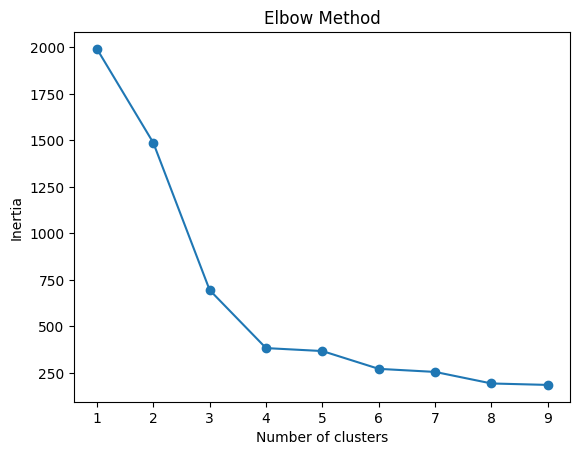

In [24]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [25]:
n_clusters = 4

### Step 5 - Run the k-means clustering algorithm

In [26]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

#### and visualize the clusters (here for the 'culmen_length_mm' column)

Trong bài toán phân cụm (clustering), phương sai của đặc trưng (feature variance) thể hiện mức độ phân tán của giá trị của một đặc trưng cụ thể trong một cụm. Nó cho biết liệu giá trị của đặc trưng đó có xu hướng tập trung gần giá trị trung bình của cụm hay phân tán rộng rãi.

**Vai trò của Feature variance:**

* **Đánh giá mức độ "chặt chẽ" của cụm:** Phương sai thấp cho thấy các điểm dữ liệu trong cụm có giá trị của đặc trưng đó gần nhau, cho thấy cụm chặt chẽ hơn theo đặc trưng đó. Ngược lại, phương sai cao cho thấy các điểm dữ liệu phân tán hơn, cụm có thể "lỏng lẻo" hơn theo đặc trưng đó.
* **Xác định đặc trưng quan trọng:** Các đặc trưng có phương sai lớn có thể đóng vai trò quan trọng trong việc phân biệt các cụm, vì chúng cho thấy sự khác biệt lớn giữa các cụm. Ngược lại, các đặc trưng có phương sai nhỏ có thể ít quan trọng hơn, vì chúng không thay đổi nhiều giữa các cụm.
* **Lựa chọn đặc trưng:** Dựa trên phương sai, ta có thể lựa chọn các đặc trưng phù hợp cho việc phân cụm. Ví dụ, ta có thể ưu tiên các đặc trưng có phương sai lớn để đảm bảo rằng các cụm được phân biệt rõ ràng dựa trên các đặc trưng này.
* **Phân tích độ nhạy cảm của thuật toán:** Một số thuật toán phân cụm có thể nhạy cảm với phương sai của đặc trưng. Ví dụ, thuật toán k-means có xu hướng tạo ra các cụm có kích thước và hình dạng tương tự nhau, và có thể gặp khó khăn với dữ liệu có phương sai đặc trưng khác nhau.

**Ví dụ:**

Giả sử ta có dữ liệu về chiều cao và cân nặng của một nhóm người. Ta muốn phân cụm họ thành các nhóm dựa trên hai đặc trưng này. Nếu phương sai của đặc trưng chiều cao trong một cụm là thấp, điều đó có nghĩa là chiều cao của các thành viên trong cụm đó khá đồng đều. Ngược lại, nếu phương sai của đặc trưng cân nặng là cao, điều đó có nghĩa là cân nặng của các thành viên trong cụm đó phân tán rộng rãi hơn.

**Lưu ý:**

* Phương sai của đặc trưng cần được xem xét trong ngữ cảnh của từng bài toán cụm.
* Phương sai chỉ là một trong nhiều yếu tố cần xem xét khi phân cụm dữ liệu. Các yếu tố khác bao gồm khoảng cách giữa các điểm dữ liệu, hình dạng của cụm, và mục tiêu của việc phân cụm.

Hy vọng giải thích này giúp bạn hiểu rõ hơn về vai trò của phương sai đặc trưng trong bài toán phân cụm.


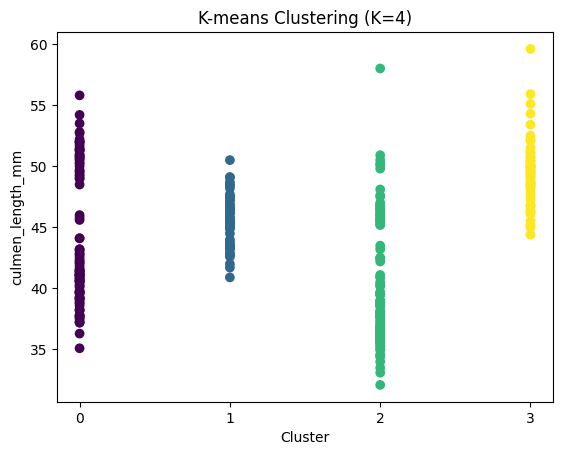

In [27]:
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

### Step 6 - create final `stat_penguins` DataFrame

In [28]:

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
